### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Gapminder dataset beolvasása

In [2]:
from gapminder import gapminder
df = gapminder
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
df.shape

(1704, 6)

### Oszlopok átnevezése

In [4]:
df.columns = ['Ország', 'Kontinens', 'Év', 'VárhatóÉletkor', 'Népesség', 'GdpPerFő']

df.head()

,Ország,Kontinens,Év,VárhatóÉletkor,Népesség,GdpPerFő
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### Változók méreteinek lecsökkentése (típus átalakítás)

In [5]:
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
Ország            object
Kontinens         object
Év                int64
VárhatóÉletkor    float64
Népesség          int64
GdpPerFő          float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [6]:
df['Év'] = df['Év'].astype('int16')
df[['VárhatóÉletkor', 'GdpPerFő']] = df[['VárhatóÉletkor', 'GdpPerFő']].astype('float32')

df['Kontinens'] = df['Kontinens'].astype('category')

In [7]:
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
Ország            object
Kontinens         category
Év                int16
VárhatóÉletkor    float32
Népesség          int64
GdpPerFő          float32
dtypes: category(1), float32(2), int16(1), int64(1), object(1)
memory usage: 45.2+ KB


### Leíró statisztikák

In [8]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Év,1704.0,1979.5,17.3,1952.0,1965.8,1979.5,1993.2,2007.0
VárhatóÉletkor,1704.0,59.5,12.9,23.6,48.2,60.7,70.8,82.6
Népesség,1704.0,29601212.3,106157896.7,60011.0,2793664.0,7023595.5,19585221.8,1318683096.0
GdpPerFő,1704.0,7215.3,9857.5,241.2,1202.1,3531.8,9325.5,113523.1


In [9]:
rp.summary_cont(df[['VárhatóÉletkor', 'Népesség', 'GdpPerFő']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,VárhatóÉletkor,1704.0,59.5,12.9,0.3,58.9,60.1
1,Népesség,1704.0,29601212.3,106157896.7,2571683.5,24557220.5,34645204.1
2,GdpPerFő,1704.0,7215.3,9857.5,238.8,6747.0,7683.7


In [10]:
rp.summary_cat(df['Kontinens'])

,Variable,Outcome,Count,Percent
0,Kontinens,Africa,624,36.6
1,,Asia,396,23.2
2,,Europe,360,21.1
3,,Americas,300,17.6
4,,Oceania,24,1.4


### Egy főre jutó GDP 2007-ben Boxplot

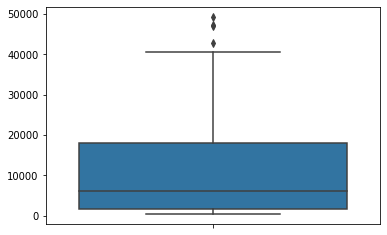

In [11]:
sns.boxplot(data=df[df['Év'] == 2007], x=['GdpPerFő'], orient='v')

In [31]:
df.corr()

,Év,VárhatóÉletkor,Népesség,GdpPerFő
Év,1.0,0.4,0.1,0.2
VárhatóÉletkor,0.4,1.0,0.1,0.6
Népesség,0.1,0.1,1.0,-0.0
GdpPerFő,0.2,0.6,-0.0,1.0


### Egy főre jutó GDP 2007-ben Boxplot

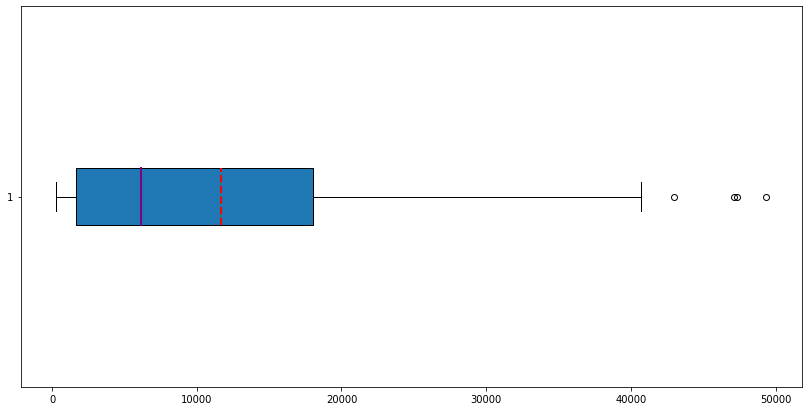

In [12]:
fig, ax = plt.subplots()

ax.boxplot((df[df['Év'] == 2007].GdpPerFő), vert=False, showmeans=True, meanline=True,
           patch_artist=True,                               #Boxplot kitöltése kékkel
           medianprops={'linewidth': 2, 'color': 'purple'}, #Medián vonal
           meanprops={'linewidth': 2, 'color': 'red'})      #Átlag vonal

fig.set_figheight(7)
fig.set_figwidth(14)

### 2007-ben 40000-nél nagyobb egy főre jutó GDP országai

In [13]:
df[(df['GdpPerFő'] > 40000) & (df['Év'] == 2007)]

,Ország,Kontinens,Év,VárhatóÉletkor,Népesség,GdpPerFő
755,Ireland,Europe,2007,78.9,4109086,40676.0
863,Kuwait,Asia,2007,77.6,2505559,47307.0
1151,Norway,Europe,2007,80.2,4627926,49357.2
1367,Singapore,Asia,2007,80.0,4553009,47143.2
1619,United States,Americas,2007,78.2,301139947,42951.7


### Kuwait és Norvégia egy főre jutó GDP-jének alakulása évenként

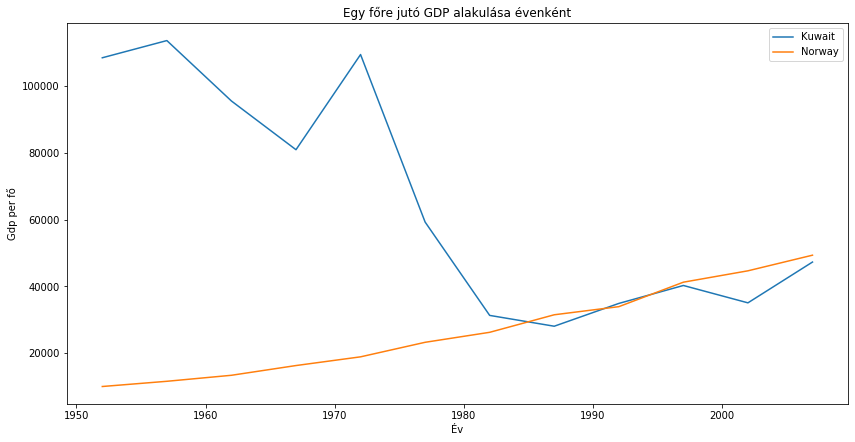

In [14]:
fig, ax = plt.subplots()

ax.plot(df[df['Ország'] == 'Kuwait'].Év, df[df['Ország'] == 'Kuwait'].GdpPerFő, label='Kuwait')
ax.plot(df[df['Ország'] == 'Norway'].Év, df[df['Ország'] == 'Norway'].GdpPerFő, label='Norway')

ax.set_xlabel('Év')
ax.set_ylabel('Gdp per fő')
ax.set_title('Egy főre jutó GDP alakulása évenként')
ax.legend()

fig.set_figheight(7)
fig.set_figwidth(14)

### Pairplot

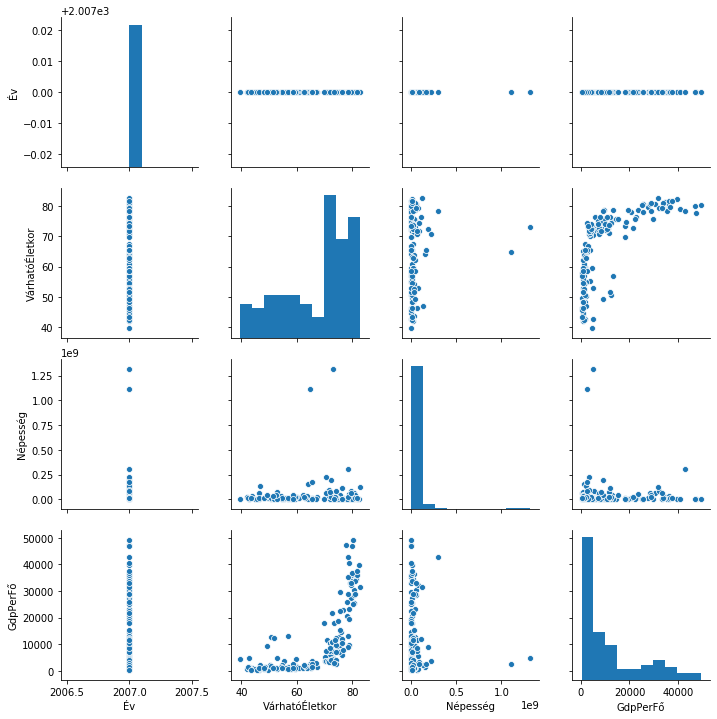

In [15]:
sns.pairplot(df[df.Év == 2007])

### Korreláció mátrix

In [16]:
df.corr()

,Év,VárhatóÉletkor,Népesség,GdpPerFő
Év,1.0,0.4,0.1,0.2
VárhatóÉletkor,0.4,1.0,0.1,0.6
Népesség,0.1,0.1,1.0,-0.0
GdpPerFő,0.2,0.6,-0.0,1.0


### Pearson p, Spearman rho, Kendall tau

In [17]:
import scipy.stats

print('   Pearson p: ', scipy.stats.pearsonr(df['GdpPerFő'], df['VárhatóÉletkor']))
print('Spearman rho: ', scipy.stats.spearmanr(df['GdpPerFő'], df['VárhatóÉletkor']))
print(' Kendall tau: ', scipy.stats.kendalltau(df['GdpPerFő'], df['VárhatóÉletkor']))

   Pearson p:  (0.5837062197812722, 3.565724696792518e-156)
Spearman rho:  SpearmanrResult(correlation=0.8264711811970715, pvalue=0.0)
 Kendall tau:  KendalltauResult(correlation=0.6369106595644447, pvalue=0.0)


### Logaritmikus regresszió

In [18]:
np.polyfit(np.log(df['GdpPerFő']), df['VárhatóÉletkor'], 1)

array([ 8.40508496, -9.10088922])

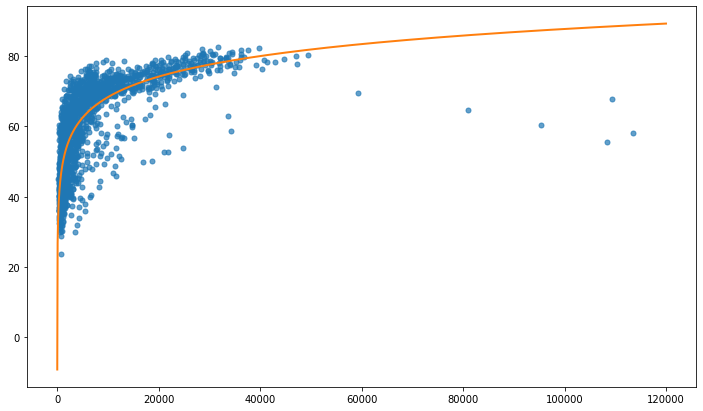

In [20]:
X = df['GdpPerFő']
y = df['VárhatóÉletkor']

def logFit(x, y):
    sumy = np.sum(y)
    sumlogx = np.sum(np.log(x))

    b = (X.size*np.sum(y*np.log(X)) - sumy*sumlogx)/(X.size*np.sum(np.log(X)**2) - sumlogx**2)
    a = (sumy - b*sumlogx)/X.size

    return a,b

def logFunc(x, a, b):
    return a + b*np.log(x)

plt.figure(figsize=(12, 7))
plt.plot(X, y, ls="none", marker='.', markersize=10, alpha=0.7)

xfit = np.linspace(1, 120000, num=1704)

plt.plot(xfit, logFunc(xfit, *logFit(X,y)), linewidth=2)

solution:
8.405085 log(x) + -9.100889 = y


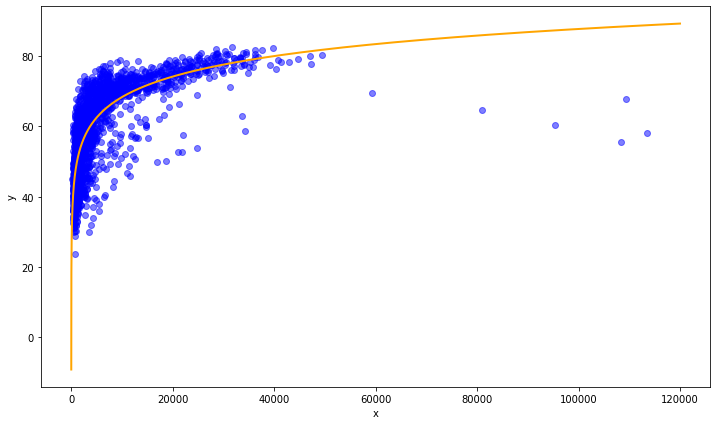

In [23]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='b', alpha=0.5)

# do fit
tmp_A = []
tmp_B = []

for i, d in enumerate(X):
    tmp_A.append([np.log(d), 1])
    tmp_B.append(y[i])
    
B = np.matrix(tmp_B).T
A = np.matrix(tmp_A)

fit = (A.T * A).I * A.T * B

print("solution:")
print("%f log(x) + %f = y" % (fit[0], fit[1]))

# plot fit
fit_x = range(1, 120000)
fit_y = [float(fit[0]) * np.log(x) + float(fit[1]) for x in fit_x]
plt.plot(fit_x, fit_y, color='orange', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Prediction

In [25]:
def predict_log(x):
    return (fit[0]*np.log(x)+fit[1])[0, 0]

predict_log(14200)

71.26010497309714

#### R^2 score

In [27]:
from sklearn.metrics import r2_score

ylog_predicted = list(map(predict_log, X))
print('R^2: ', r2_score(y, ylog_predicted)) #(tényleges, predicted)

R^2:  0.6522466389710054


###   
### Logaritmikus regresszió from scratch

In [ ]:
log_X = np.log(X)

plt.figure(figsize=(12, 7))
sns.regplot(x=log_X, y=y) #log(X), y

In [ ]:
stats.linregress(np.log(X), y)

#### B1 értéke

In [ ]:
számláló = 0
nevező = 0

for a, b in zip(log_X, y):
    számláló += (a-np.mean(log_X))*(b-np.mean(y))  #B1 számlálója:  SUM[ (Xi - X_átlag)*(Yi-Y_átlag) ]
    nevező += (a-np.mean(log_X))**2                #B1 nevezője:   (Xi-X_átlag)**2
    
B1 = számláló/nevező
print('B1: ', B1)

#### B0 értéke

In [ ]:
B0 = np.mean(y)-B1*np.mean(log_X)                 #B0: Y_átlag - B1*Xátlag
print('B0: ', B0)

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(log_X, y, alpha=0.8)

vonal_x = np.linspace(np.min(log_X)-0.4, np.max(log_X)+0.2, 2)
vonal_y = (B0 + B1*(vonal_x))

plt.plot(vonal_x, vonal_y, c='darkviolet', linewidth=3)
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)

x_vonal = np.linspace(20, 120000, 120000)

plt.plot(x_vonal, B0 + B1*np.log(x_vonal), c='darkviolet', linewidth=3,  label=('{0:.2f}'.format(B0),' + ','{0:.2f}'.format(B1), '*log(X)')) #Y = B0 + log(B1*X)
plt.legend()
plt.show()

#### Prediction

In [ ]:
def log_predict(x):
    return B0 + B1*np.log(x)

log_predict(200)

#### R^2

In [ ]:
from sklearn.metrics import r2_score

ylog_predicted = list(map(log_predict, x))
print('R^2: ', r2_score(y, ylog_predicted)) #(tényleges, predicted)

In [21]:
def log_predict(x):
    return B0 + B1*np.log(x)

log_predict(14200)

NameError: name 'B0' is not defined

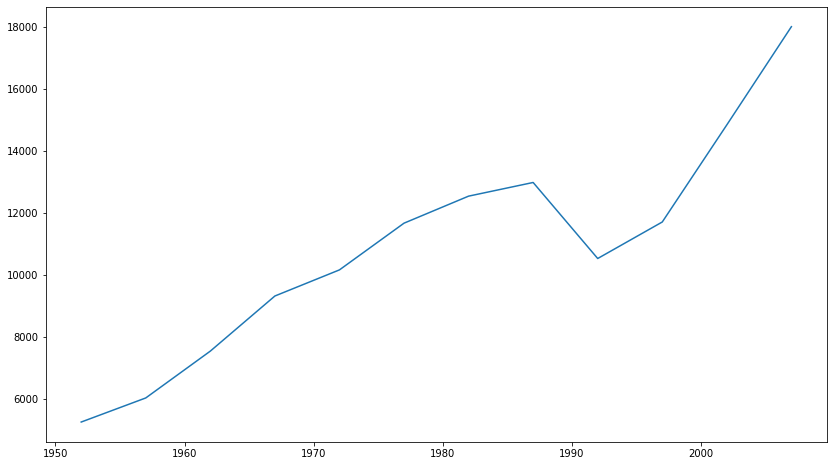

In [29]:
plt.figure(figsize=(14, 8))
plt.plot(df[df['Ország'] == 'Hungary'].Év, df[df['Ország'] == 'Hungary'].GdpPerFő)

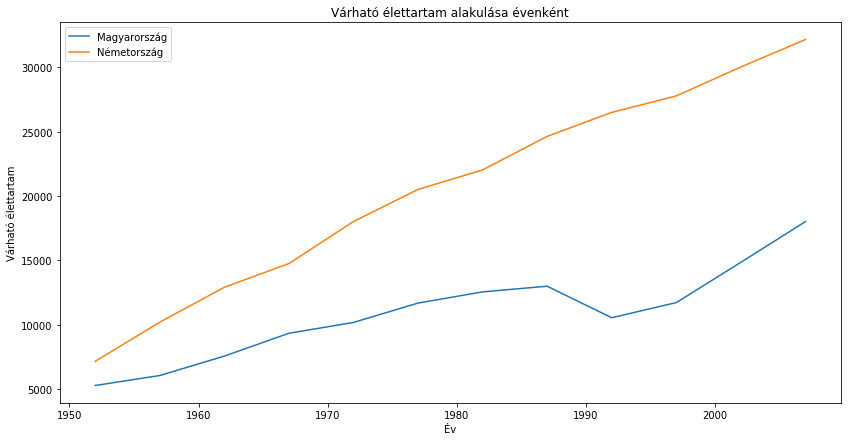

In [30]:
fig, ax = plt.subplots()

ax.plot(df[df['Ország'] == 'Hungary'].Év, df[df['Ország'] == 'Hungary'].GdpPerFő, label='Magyarország')
ax.plot(df[df['Ország'] == 'Germany'].Év, df[df['Ország'] == 'Germany'].GdpPerFő, label='Németország')

ax.set_xlabel('Év')
ax.set_ylabel('Várható élettartam')
ax.set_title('Várható élettartam alakulása évenként')
ax.legend()

fig.set_figheight(7)
fig.set_figwidth(14)